<a href="https://colab.research.google.com/github/themarcos-abhi/A-Secret-page-/blob/main/Lab_10_Visualization_of_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load dataset (using a similar alternative)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Display basic info
print(df.head())
print("\nDataset shape:", df.shape)
print("\nSummary statistics:")
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Dataset shape: (20640, 9)

Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

In [ ]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# If there were missing values, we'd handle them here
# For this dataset, there typically aren't any

# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")



Intercept: -37.02327770606409
Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R-squared (R²): 0.5758


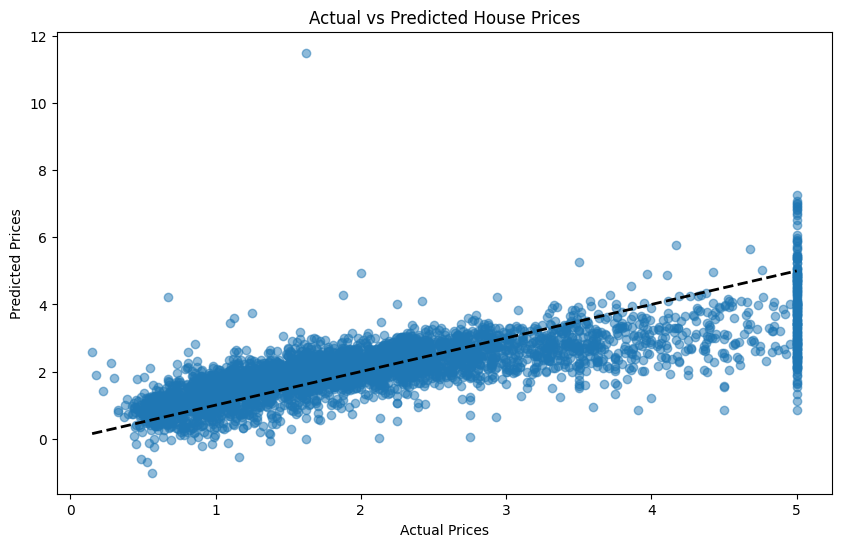

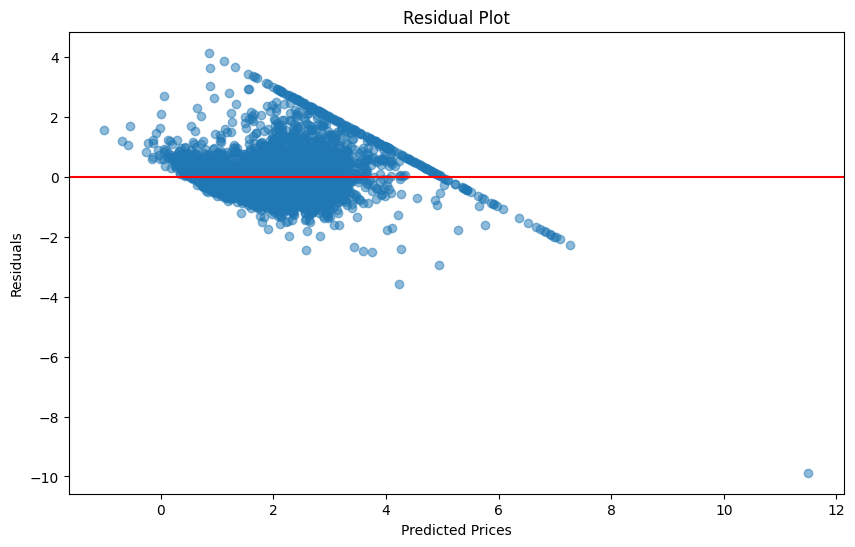

In [ ]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

🌳 Decision Tree Classifier by Abhishek Kumar

=== Dataset Overview ===
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

Shape: (150, 4)

First 5 samples:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

=== Model Evaluation ===
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accura

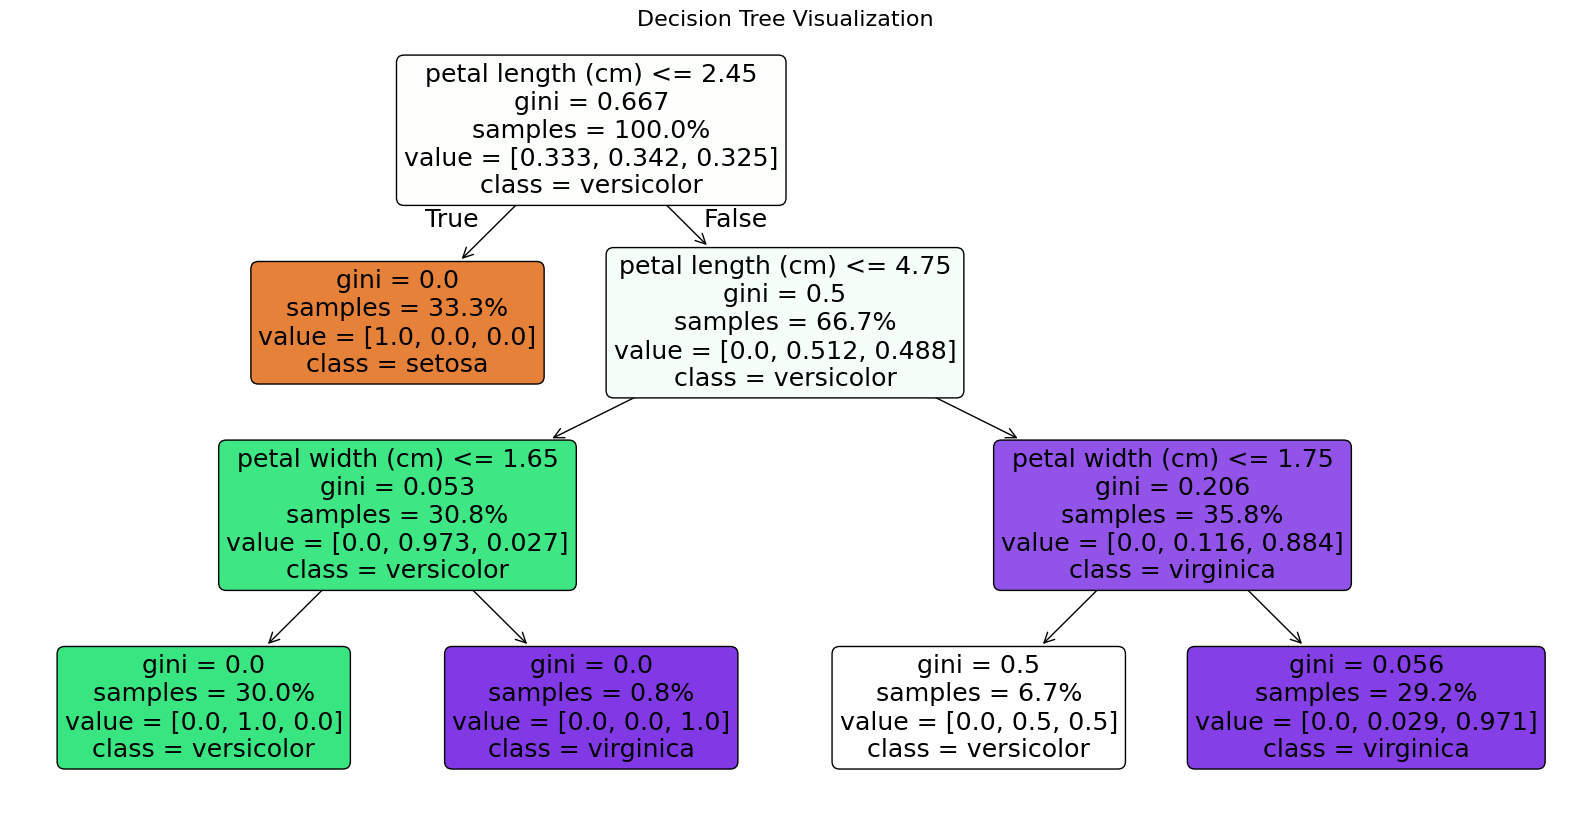


=== Feature Importance ===
             Feature  Importance
2  petal length (cm)    0.934626
3   petal width (cm)    0.065374
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000

=== Sample Prediction ===
Sample features:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                6.1               2.8                4.7               1.2
Predicted class: versicolor
Actual class: versicolor


In [ ]:
# Decision Tree Classifier by Abhishek Kumar
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("🌳 Decision Tree Classifier by Abhishek Kumar")
print("\n=== Dataset Overview ===")
print(f"Features: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")
print(f"\nShape: {X.shape}")
print("\nFirst 5 samples:")
print(X.head())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Feature importance
importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n=== Feature Importance ===")
print(importance)

# Prediction example
sample = X_test.iloc[0:1]
prediction = model.predict(sample)[0]
print(f"\n=== Sample Prediction ===")
print(f"Sample features:\n{sample}")
print(f"Predicted class: {iris.target_names[prediction]}")
print(f"Actual class: {iris.target_names[y_test[0]]}")

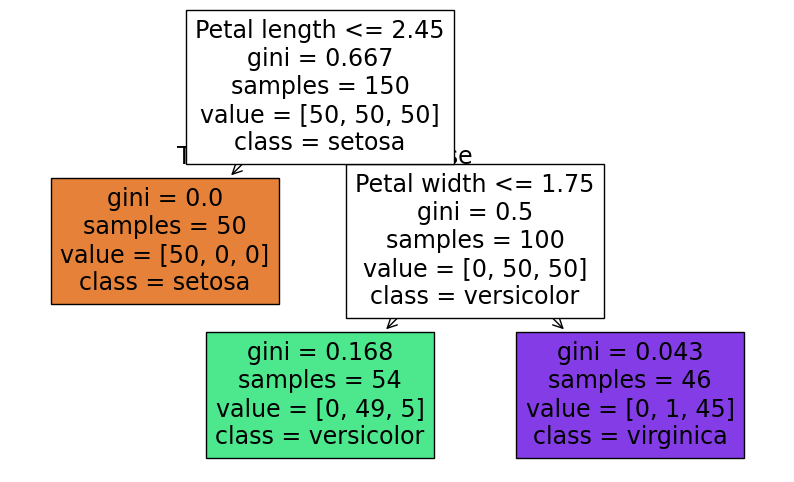


Prediction for [[3.5, 1.4]]: versicolor


In [ ]:
# Simple Decision Tree by Abhishek Kumar
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Load sample data
iris = load_iris()
X, y = iris.data[:, 2:], iris.target  # Using only petal length & width

# 2. Create and train the tree
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X, y)

# 3. Visualize the tree
plt.figure(figsize=(10,6))
plot_tree(tree,
          feature_names=['Petal length', 'Petal width'],
          class_names=iris.target_names,
          filled=True)
plt.show()

# 4. Make a prediction
sample = [[3.5, 1.4]]  # Petal length, width
pred = tree.predict(sample)
print(f"\nPrediction for {sample}: {iris.target_names[pred][0]}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Data Analysis with Visualization by Abhishek Kumar\n")
data = pd.read_csv('sample_data.csv')

# Basic Analysis (unchanged)
print("=== Dataset Overview ===")
print(f"Shape: {data.shape}")
print(f"\nFirst 5 rows:\n{data.head()}")
print(f"\nData Types:\n{data.dtypes}")

# Visualization Section
print("\n=== Data Visualization ===")
plt.figure(figsize=(12, 6))

# Scatter Plot 1: Value vs Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='value', y='score', hue='category', palette='viridis')
plt.title('Value vs Score by Category')
plt.xlabel('Value')
plt.ylabel('Score')

# Scatter Plot 2: Value distribution with regression line
plt.subplot(1, 2, 2)
sns.regplot(data=data, x='value', y='score', scatter_kws={'alpha':0.5})
plt.title('Value vs Score with Trend Line')
plt.xlabel('Value')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Advanced Scatter Matrix (for numeric columns)
print("\n=== Scatter Matrix ===")
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 1:
    sns.pairplot(data[numeric_cols], diag_kind='kde', corner=True)
    plt.suptitle('Pairwise Relationships', y=1.02)
    plt.show()
else:
    print("Not enough numeric columns for scatter matrix")

# Categorical Analysis
if 'category' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='value', y='score', hue='category', style='active', s=100)
    plt.title('Value vs Score by Category and Active Status')
    plt.xlabel('Value')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Data Analysis with Visualization by Abhishek Kumar



FileNotFoundError: [Errno 2] No such file or directory: 'sample_data.csv'